# Phase-1 Project on Aviation Accidents Data

## 1- Introduction
In this project, I examined aviation incident data from 2021–2022 titled: **flight.csv**. The dataset included accident dates, aircraft types, registration numbers, operators, fatalities, locations and damage classifications.

## 2- Project goals
- Produce a clean dataset by filtering and handling missing values.
- Identify patterns in aviation incidents, such as common aircraft types and operators.
- Visualize trends over time to understand accident frequency.


## 3- Libraries and data analysis
Use **Pandas** for data manipulation and **Matplotlib** for visualization. The goal was to prepare the dataset, explore patterns, and generate insights for business stakeholders.
1. Exploratory data analysis was run
2. Filter Data 
    - Deleted one column- "Unnamed: 0"
    - Deleted duplicate data- 1250 rows were found to be duplictates
    - New index set
    - Renamed 4 columns
    - Changed "acc_date" and "fat" column datatypes

3- Visualization
The following three visualizations have been ploted to support interpretation of the data:
    a) Barchart of top 5 Most Common Aircraft Types 
    b) Bar chart of fatalities by Operator
    c) Line chart of accident frequency by duration


### Step 1 Import libraries and load data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load data - dubbed "flight_data"

flight_data= pd.read_csv('flight.csv')

### Step 2: Exploratory data analysis

In [4]:
# .info()
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


The data has 8 columns and 2500 rows. Columns with categorical data are 7 and 1 column with numeric data. One column is unamed.

In [5]:
# Display a sample ofthe dataset
flight_data.head()

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


In [6]:
flight_data.tail()

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
2495,1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,1248,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub
2499,1249,unk. date 2018,Rockwell Sabreliner 80,N337KL,private,0,"Eugene Airport, OR (EUG)",sub


"Unnamed: 0" column looks like an index.
The columns need to be renamed.

In [7]:
# check the presence and number of missing values in each column
flight_data.isnull().sum()

Unnamed: 0     0
acc.date       0
type           0
reg           92
operator      14
fat           12
location       0
dmg            0
dtype: int64

In [8]:
# check the number of unique values
flight_data.nunique()

Unnamed: 0    1250
acc.date       871
type           523
reg           1194
operator       827
fat             47
location      1059
dmg              6
dtype: int64

This output shows there could be presence of duplicate data

In [9]:
#check for duplicates
flight_data.duplicated().value_counts()

True     1250
False    1250
dtype: int64

Half (1250) rows are duplicated which is like 50% of the dataset

# Step 2: Filter Data

In [10]:
# drop columns
# drop unnamed column because it is an index and its also repeated
flight_data.drop('Unnamed: 0', axis= 1, inplace=True)

In [11]:
#rename columns
flight_data.rename(columns= {'acc.date': 'accident_date', 'type': 'aircraft_type', 'fat': 'fatalities','dmg': 'damage'}, inplace=True) 

In [12]:
# delete the duplicates
flight_data.drop_duplicates(inplace=True)

In [13]:
# reset index - the parameter is itended to delete the old index
flight_data.reset_index(drop=True)

,accident_date,aircraft_type,reg,operator,fatalities,location,damage
0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...
1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
1248,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


In [14]:
flight_data.isnull().sum()

accident_date     0
aircraft_type     0
reg              46
operator          7
fatalities        6
location          0
damage            0
dtype: int64

In [15]:
flight_data.isnull().mean()*100

accident_date    0.00
aircraft_type    0.00
reg              3.68
operator         0.56
fatalities       0.48
location         0.00
damage           0.00
dtype: float64

The proportion of missing data compared to the overall dataset is very minimal(<5%>) hence will not drop any columns or rows

In [16]:
#convert the *accident_date column* into a uniform date datatype
flight_data['accident_date']= pd.to_datetime(flight_data['accident_date'], errors='coerce')

In [17]:
#convert the fatalities column into an interger datatype
flight_data['fatalities']= pd.to_numeric(flight_data['fatalities'], errors='coerce')


In [18]:
#confirm changes
flight_data.dtypes


accident_date    datetime64[ns]
aircraft_type            object
reg                      object
operator                 object
fatalities              float64
location                 object
damage                   object
dtype: object

## Step 3: Visualization

Text(0, 0.5, 'Number of Incidents')

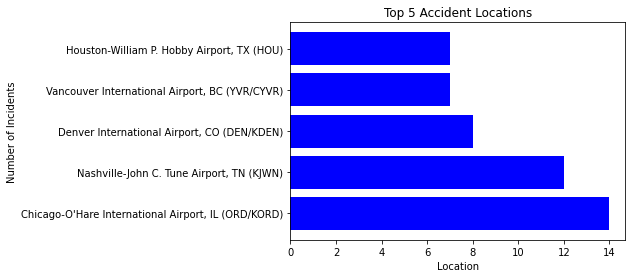

In [19]:
fig, ax = plt.subplots()

# plot a barchart of top accident locations 

#1- lets get the top accident locations
top_locations= flight_data['location'].value_counts().head()

ax.barh(top_locations.index, top_locations.values, color='blue')
ax.set_title('Top 5 Accident Locations')
ax.set_xlabel('Location')
ax.set_ylabel('Number of Incidents')

Text(0, 0.5, 'Total Fatalities')

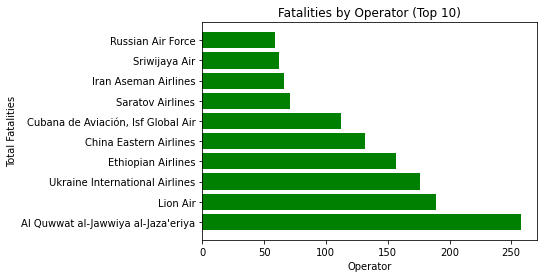

In [20]:
#2 fatalities by operator

#first we group the dataset by operator then perform a count of the fatalities
fig, ax= plt.subplots()
fatalities_operator= flight_data.groupby('operator')['fatalities'].sum().sort_values(ascending=False).head(10)
ax.barh(fatalities_operator.index, fatalities_operator.values, color='green')
ax.set_title('Fatalities by Operator (Top 10)')
ax.set_xlabel('Operator')
ax.set_ylabel('Total Fatalities')

Text(0, 0.5, 'Number of Incidents')

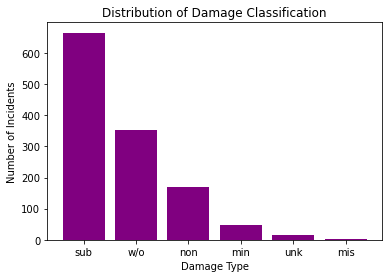

In [21]:
#3 Distribution by damage classification
fig, ax = plt.subplots()
damage_count= flight_data['damage'].value_counts()
ax.bar(damage_count.index, damage_count.values, color='purple')
ax.set_title('Distribution of Damage Classification')
ax.set_xlabel('Damage Type')
ax.set_ylabel('Number of Incidents')

In [22]:
#change the values of damage type column in the dataset
flight_data['damage'] = flight_data['damage'].map({'w/o': 'Write-Off', 'sub': 'Substantial', 'non': 'No Damage', 'min': 'Minor', 'unk': 'np.nan',
    'mis': 'np.nan'})

I have treated unknown and missing as Null values

Text(0, 0.5, 'Number of Incidents')

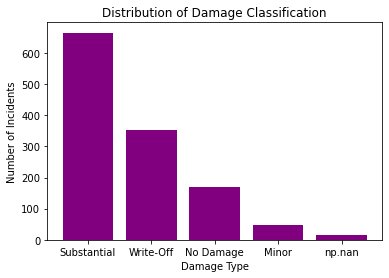

In [23]:
#repeat the plot

#3 Distribution by damage classification
fig, ax = plt.subplots()
damage_count= flight_data['damage'].value_counts()
ax.bar(damage_count.index, damage_count.values, color='purple')
ax.set_title('Distribution of Damage Classification')
ax.set_xlabel('Damage Type')
ax.set_ylabel('Number of Incidents')

## Save the cleaned file Excel
Save the cleaned data so can use in visualization under Tableau

In [24]:

# Save DataFrame to Excel
flight_data.to_excel("cleaned_flight_data.xlsx", index=False)

## Summary and Insights
The analysis highlights clear patterns in damage classifications and fatality distributions. The visualizations of operator fatalities and damage types reveal that a small number of operators account for a disproportionately high share of fatalities and that Most recorded incidents result in either Write-Off or Substantial damage, with relatively few cases classified as Minor or No Damage.
